## **Customer Satisfaction Prediction**

In [ ]:
# ========= Setup: libraries =========
!pip install --quiet gdown joblib matplotlib seaborn scikit-learn pandas

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print('Environment ready. Python version:', sys.version)


Environment ready. Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
data_path = "/customer_support_tickets.csv"
print('data_path =', data_path)

data_path = /customer_support_tickets.csv


In [ ]:
# Load data
data = pd.read_csv(data_path)
print('Rows, columns:', data.shape)
display(data.head())
print('\nInfo:')
print(data.info())

Rows, columns: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22/03/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01/06/2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22/05/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01/06/2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14/07/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01/06/2023 11:14,01/06/2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13/11/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01/06/2023 07:29,01/06/2023 01:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04/02/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01/06/2023 00:12,01/06/2023 19:53,1.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 

Exploratory Data Analysis (EDA)

In [64]:
# Basic stats
print('\nDescriptive statistics:')
display(data.describe(include='all').transpose())

# Convert date if present
if 'Date of Purchase' in data.columns:
    try:
        data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
        data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
    except Exception as e:
        print('Date conversion failed:', e)


Descriptive statistics:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Ticket ID,8469.0,NaN,NaN,NaN,4235.0,1.0,2118.0,4235.0,6352.0,8469.0,2444.934048
Customer Name,8469,8028,Michael Garcia,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Email,8469,8320,bsmith@example.com,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Age,8469.0,NaN,NaN,NaN,44.026804,18.0,31.0,44.0,57.0,70.0,15.296112
Customer Gender,8469,3,Male,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Purchased,8469,42,Canon EOS,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Purchase,8469,NaN,NaN,NaN,2020-12-30 01:35:13.071201024,2020-01-01 00:00:00,2020-07-02 00:00:00,2020-12-31 00:00:00,2021-07-01 00:00:00,2021-12-30 00:00:00,NaN
Ticket Type,8469,5,Refund request,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket Subject,8469,16,Refund request,576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket Description,8469,8077,I'm having an issue with the {product_purchase...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Top 10 common issues
if 'Ticket Subject' in data.columns:
    common_issues = data['Ticket Subject'].value_counts().head(10)
    print("Top 10 Common Issues:")
    print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


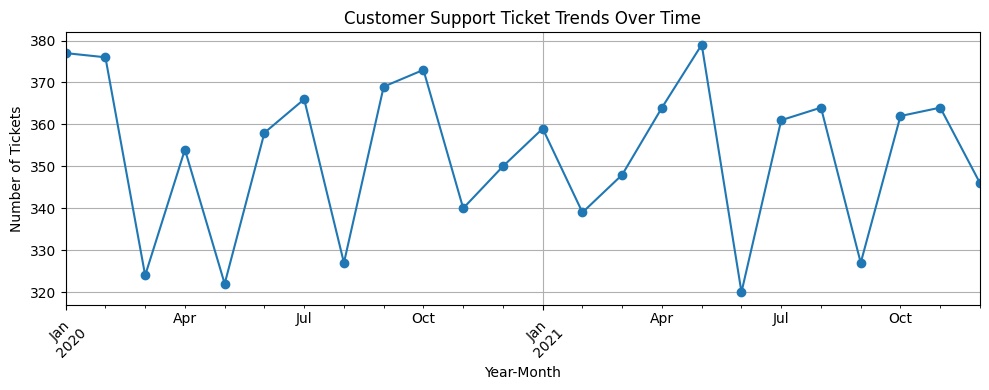

In [60]:
# Plot ticket trends over time
if 'YearMonth' in data.columns:
    ticket_trends = data.groupby('YearMonth').size()
    plt.figure(figsize=(10,4))
    ticket_trends.plot(kind='line', marker='o')
    plt.title('Customer Support Ticket Trends Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Tickets')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [70]:
# Segment based on ticket types
if 'Ticket Type' in data.columns:
    ticket_type_segmentation = data.groupby('Ticket Type').size()
    print("\nSegmentation based on Ticket Types:")
    print(ticket_type_segmentation)

# Segment based on satisfaction levels
if 'Customer Satisfaction Rating' in data.columns:
    satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
    print("\nSegmentation based on Customer Satisfaction Levels:")
    print(satisfaction_segmentation)



Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


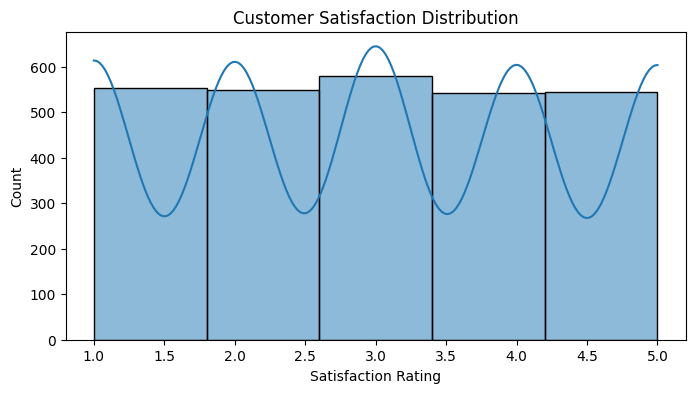

In [61]:
# Satisfaction distribution
if 'Customer Satisfaction Rating' in data.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data['Customer Satisfaction Rating'].dropna(), bins=5, kde=True)
    plt.title('Customer Satisfaction Distribution')
    plt.xlabel('Satisfaction Rating')
    plt.show()

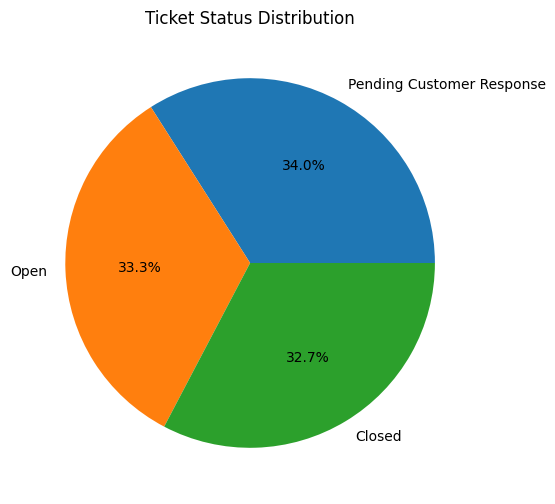

In [58]:
# Ticket status pie
if 'Ticket Status' in data.columns:
    plt.figure(figsize=(6,6))
    data['Ticket Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Ticket Status Distribution')
    plt.ylabel('')
    plt.show()

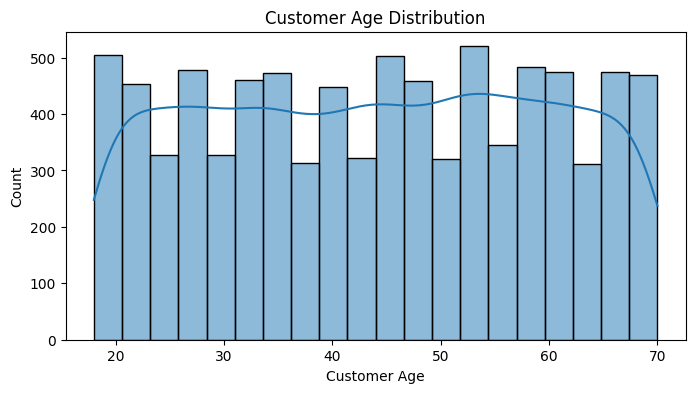

In [56]:
# Additional EDA plots (Age, Gender, Channel, Priority)
if 'Customer Age' in data.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data['Customer Age'].dropna(), bins=20, kde=True)
    plt.title('Customer Age Distribution')
    plt.show()

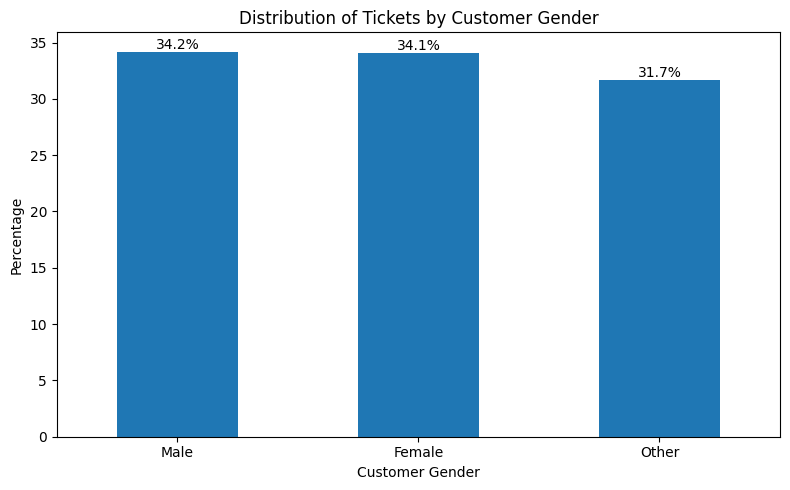

In [78]:
if 'Customer Gender' in data.columns:
    plt.figure(figsize=(8, 5))
    gender_counts = data['Customer Gender'].value_counts()
    total_customers = data['Customer Gender'].count()
    gender_percentages = (gender_counts / total_customers) * 100

    ax = gender_percentages.plot(kind='bar')
    plt.title('Distribution of Tickets by Customer Gender')
    plt.xlabel('Customer Gender')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)

    # Add percentages on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()

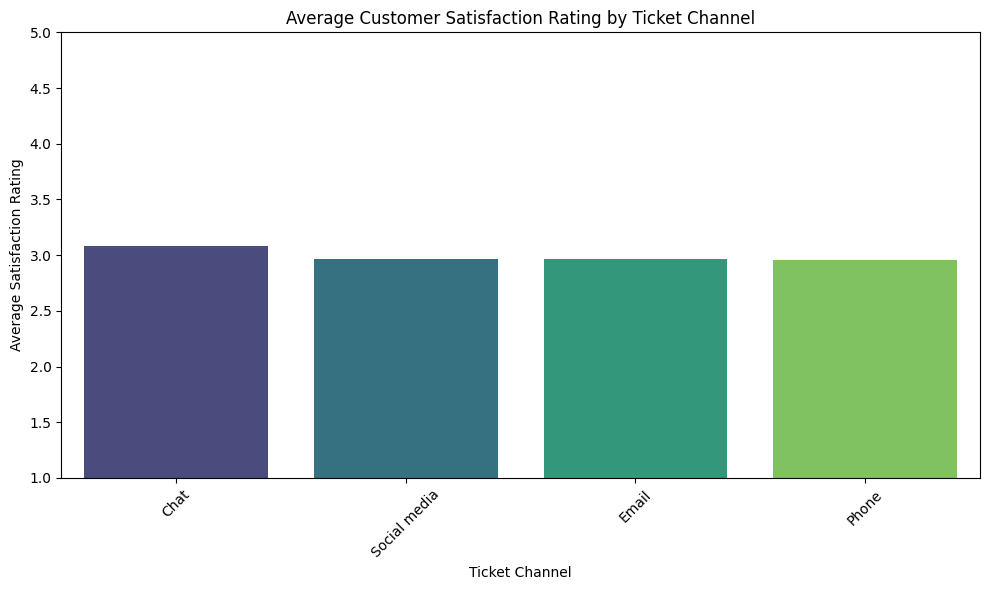

In [80]:
if 'Ticket Channel' in data.columns and 'Customer Satisfaction Rating' in data.columns:
    # Calculate average satisfaction rating by Ticket Channel
    avg_satisfaction_by_channel = data.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().reset_index()

    # Sort by average satisfaction for better visualization
    avg_satisfaction_by_channel = avg_satisfaction_by_channel.sort_values(by='Customer Satisfaction Rating', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Ticket Channel', y='Customer Satisfaction Rating', data=avg_satisfaction_by_channel, hue='Ticket Channel', palette='viridis',
                legend=False)
    plt.title('Average Customer Satisfaction Rating by Ticket Channel')
    plt.xlabel('Ticket Channel')
    plt.ylabel('Average Satisfaction Rating')
    plt.ylim(1, 5) # As satisfaction ratings are between 1 and 5
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

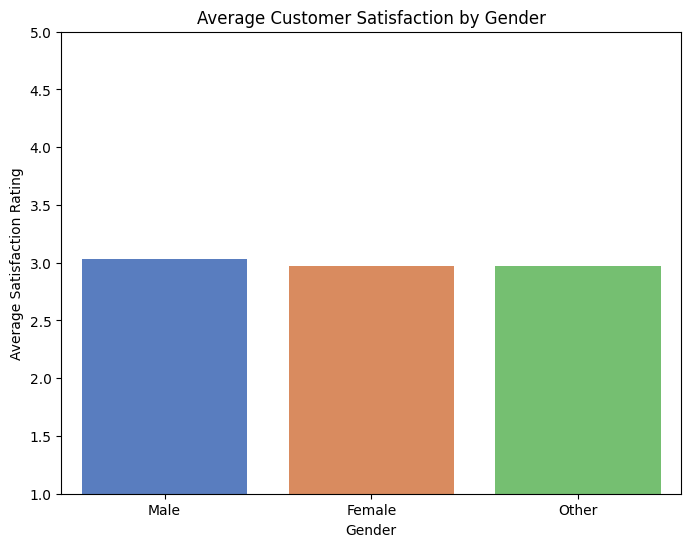

In [83]:
# Average Customer Satisfaction by Gender (Bar Plot)
if 'Customer Gender' in data.columns and 'Customer Satisfaction Rating' in data.columns:
    average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
    plt.figure(figsize=(8, 6))

    sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',
    order=['Male', 'Female', 'Other'])

    plt.title('Average Customer Satisfaction by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Average Satisfaction Rating')
    plt.ylim(1, 5) # Adjust y-axis limit if needed
    plt.show()

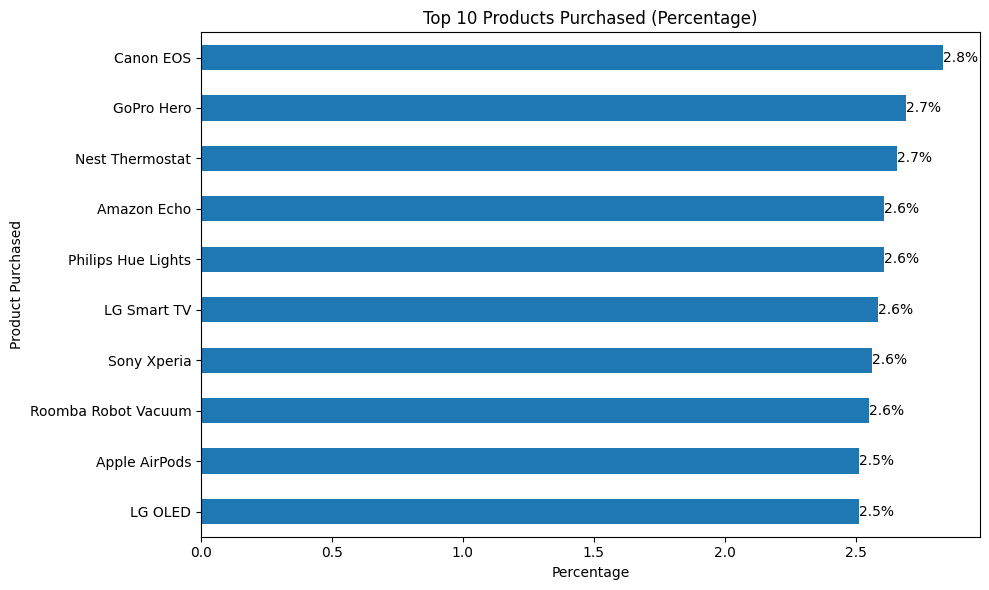

In [74]:
if 'Product Purchased' in data.columns:
    plt.figure(figsize=(10,6))
    # Calculate value counts and then their percentage
    product_counts = data['Product Purchased'].value_counts().head(10)
    total_products = data['Product Purchased'].count()
    product_percentages = (product_counts / total_products) * 100

    ax = product_percentages.plot(kind='barh')
    plt.title('Top 10 Products Purchased (Percentage)')
    plt.xlabel('Percentage')
    plt.ylabel('Product Purchased')
    plt.gca().invert_yaxis()

    # Add percentages on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()

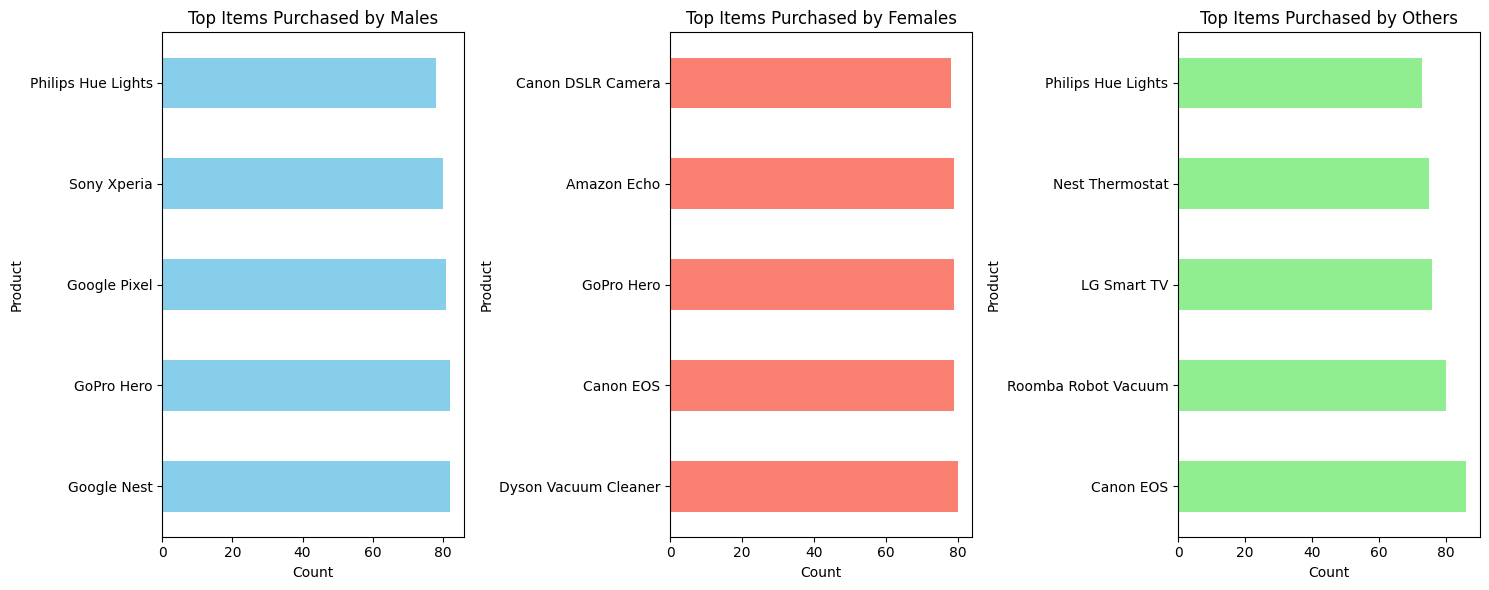

In [94]:
# Top Items Purchased by Gender (Horizontal Bar Chart)
if 'Product Purchased' in data.columns and 'Customer Gender' in data.columns:
    plt.figure(figsize=(15, 6))

    # Define a helper function for plotting
    def plot_top_items_by_gender(gender, subplot_num, color):
        plt.subplot(1, 3, subplot_num)
        top_items = data[data['Customer Gender'] == gender]['Product Purchased'].value_counts().head(5)
        top_items.plot(kind='barh', color=color)
        plt.title(f'Top Items Purchased by {gender}s')
        plt.xlabel('Count')
        plt.ylabel('Product')

    plot_top_items_by_gender('Male', 1, 'skyblue')
    plot_top_items_by_gender('Female', 2, 'salmon')
    plot_top_items_by_gender('Other', 3, 'lightgreen')

    plt.tight_layout()
    plt.show()

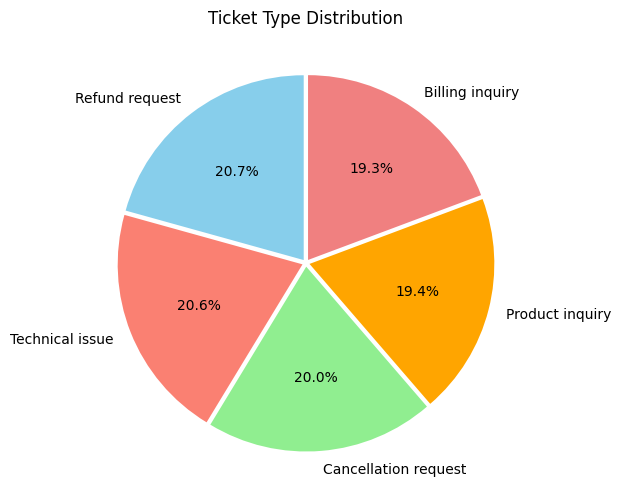

In [93]:
# Count ticket types
if 'Ticket Type' in data.columns:
    ticket_type_distribution = data['Ticket Type'].value_counts()
    # Plot
    plt.figure(figsize=(8, 6))
    pie_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral'] # Define colors as a variable
    explode_values = [0.02] * len(ticket_type_distribution) # Slightly separate all slices
    ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',
                                  colors=pie_colors[:len(ticket_type_distribution)],
                                  explode=explode_values,
                                  startangle=90) # Set a start angle for orientation
    plt.title('Ticket Type Distribution')
    plt.ylabel('')
    plt.show()

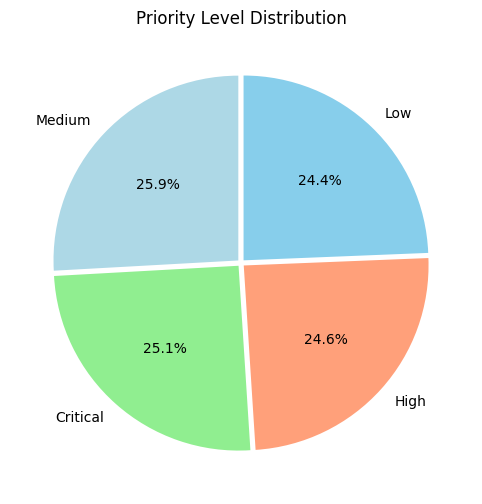

In [95]:
# Count ticket priorities
if 'Ticket Priority' in data.columns:
    # Get the value counts for each ticket priority level
    priority_distribution = data['Ticket Priority'].value_counts()

    # Create a new figure for the plot with a specified size
    plt.figure(figsize=(8, 6))

    # Define a list of colors for the pie chart slices
    pie_colors = ['lightblue', 'lightgreen', 'lightsalmon', 'skyblue']

    # Calculate explode values to slightly separate all slices for better visibility
    explode_values = [0.02] * len(priority_distribution)

    # Plot the pie chart
    priority_distribution.plot(kind='pie',
                               autopct='%1.1f%%', # Display percentages on slices
                               colors=pie_colors[:len(priority_distribution)], # Apply defined colors
                               explode=explode_values, # Apply slice separation
                               startangle=90) # Set the start angle for the first slice

    plt.title('Priority Level Distribution') # Set the title of the pie chart
    plt.ylabel('') # Remove the default y-axis label for a cleaner look
    plt.show()

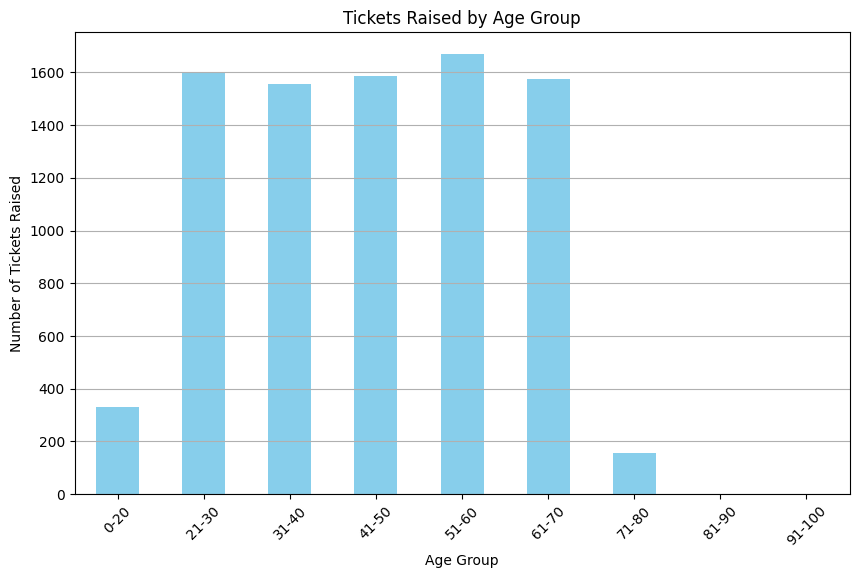

In [96]:
# Define age groups
if 'Customer Age' in data.columns:
    bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    # Categorize customers into age groups
    data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)
    # Calculate number of tickets raised by each age group
    tickets_by_age_group = data.groupby('Age Group').size()
    # Plot
    plt.figure(figsize=(10, 6))
    plot_color = 'skyblue'
    tickets_by_age_group.plot(kind='bar', color=plot_color)
    plt.title('Tickets Raised by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Tickets Raised')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

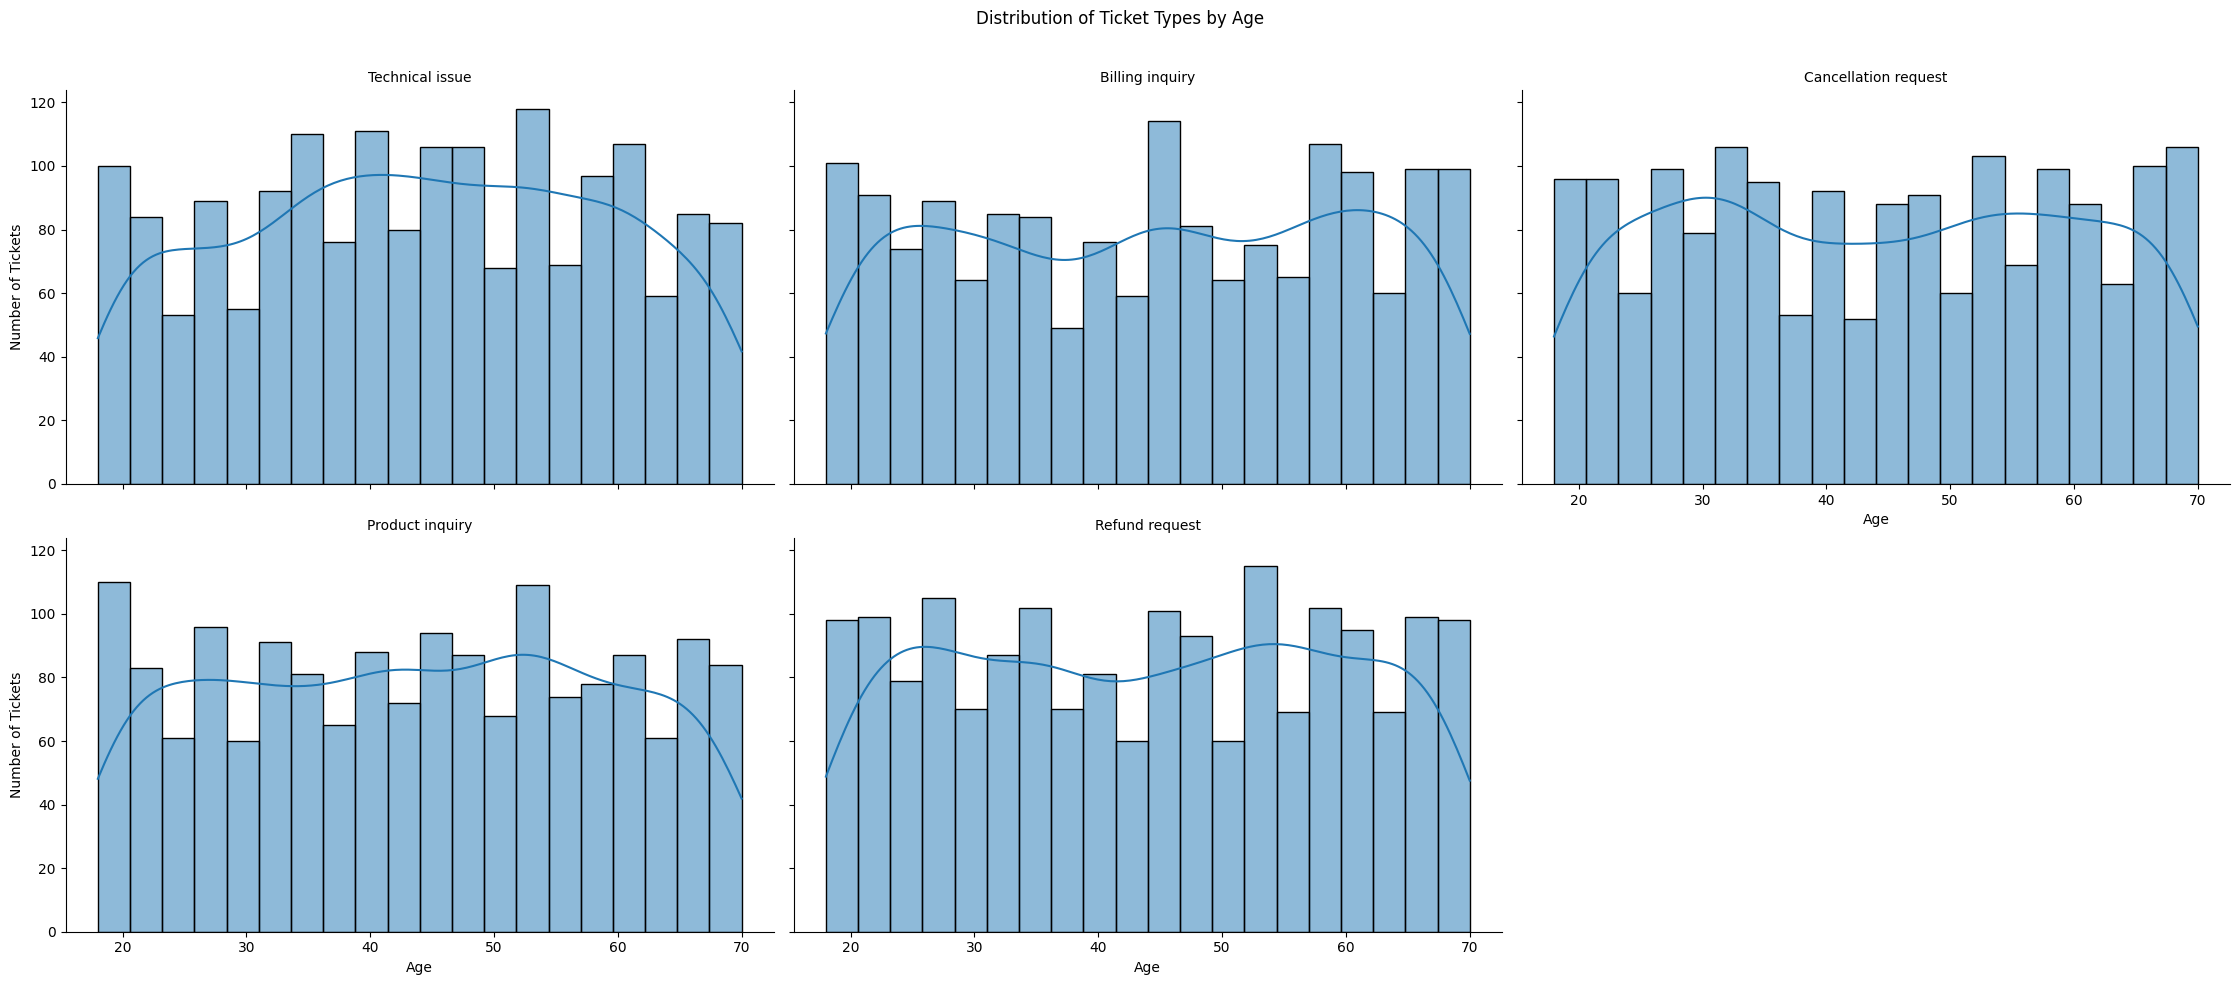

In [97]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check if required columns exist before plotting
if 'Ticket Type' in data.columns and 'Customer Age' in data.columns:
    # Create a facet grid for each ticket type
    g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3, height=5, aspect=1.5)

    # Map a histogram plot to each facet
    g.map(sns.histplot, 'Customer Age', bins=20, kde=True)

    # Set titles for each subplot
    g.set_titles('{col_name}')

    # Set axis labels for the entire grid
    g.set_axis_labels('Age', 'Number of Tickets')

    # Adjust layout to prevent labels from overlapping
    plt.subplots_adjust(top=0.9)

    # Set a main title for the entire figure
    g.fig.suptitle('Distribution of Ticket Types by Age')

    # Show the plot
    plt.show()

Preprocessing & Feature Engineering

In [98]:
df = data.copy()

# Drop initial identifier columns that are not useful for modeling
drop_cols_initial = ['Ticket ID', 'Customer Name', 'Customer Email']
for c in drop_cols_initial:
    if c in df.columns:
        df.drop(columns=[c], inplace=True)

# Replace infinite values with NaN for consistent missing value handling
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where 'Customer Satisfaction Rating' is missing, as it's our target variable
if 'Customer Satisfaction Rating' in df.columns:
    df = df.dropna(subset=['Customer Satisfaction Rating']).reset_index(drop=True)

# Process Customer Age: define age groups for categorization
if 'Customer Age' in df.columns:
    bins = [0,20,30,40,50,60,70,80,90,100]
    labels = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
    df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate response delay in hours using original data columns before they are dropped from 'df'
if 'First Response Time' in data.columns and 'Time to Resolution' in data.columns:
    first_response_dt = pd.to_datetime(data['First Response Time'], errors='coerce')
    time_to_resolution_dt = pd.to_datetime(data['Time to Resolution'], errors='coerce')
    df['response_delay_hours'] = (time_to_resolution_dt - first_response_dt).dt.total_seconds() / 3600
    df['response_delay_hours'].fillna(0, inplace=True) # Fill NaNs for delay with 0 (assuming no delay if times are missing)

# Define final list of columns to drop, including processed date/time, age groups, and resolution details
cols_to_drop_final = ['Date of Purchase', 'YearMonth', 'First Response Time', 'Time to Resolution', 'Age Group', 'Resolution']
for col_to_drop in cols_to_drop_final:
    if col_to_drop in df.columns:
        df.drop(columns=[col_to_drop], inplace=True)

# Identify remaining categorical columns for encoding (these will be 'object' dtype)
cat_features_for_encoding = df.select_dtypes(include='object').columns.tolist()

print('Categorical columns to encode:', cat_features_for_encoding)

# Apply Label Encoding to categorical features
label_encoders = {}
for col in cat_features_for_encoding:
    df[col] = df[col].fillna('NA') # Fill any remaining NaNs in categorical columns before encoding
    le = LabelEncoder()
    try:
        df[col] = le.fit_transform(df[col].astype(str)) # Ensure data is string type for encoding
        label_encoders[col] = le
    except Exception as e:
        print(f'Failed to encode column {col}: {e}')

# Define target and feature sets
target_col = 'Customer Satisfaction Rating'
if target_col not in df.columns:
    raise KeyError(f'Target column {target_col} not found in dataset. Please ensure CSV contains this column.')

X = df.drop(columns=[target_col], errors='ignore') # Features
y = df[target_col].astype(int) # Target variable, ensuring it's integer type

print('\nFeature matrix shape:', X.shape)
print('Target distribution:')
print(y.value_counts())

print('\nX dtypes after preprocessing and encoding:')
print(X.dtypes)

Categorical columns to encode: ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']

Feature matrix shape: (2769, 10)
Target distribution:
Customer Satisfaction Rating
3    580
1    553
2    549
5    544
4    543
Name: count, dtype: int64

X dtypes after preprocessing and encoding:
Customer Age              int64
Customer Gender           int64
Product Purchased         int64
Ticket Type               int64
Ticket Subject            int64
Ticket Description        int64
Ticket Status             int64
Ticket Priority           int64
Ticket Channel            int64
response_delay_hours    float64
dtype: object


In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numeric columns using StandardScaler
# Identify numerical columns in the feature set X
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print('Training set:', X_train.shape, 'Test set:', X_test.shape)

Training set: (1938, 10) Test set: (831, 10)


Model Building — Random Forest Classifier

In [100]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)

# Save the trained model and preprocessing objects (scaler and label encoders)
# This allows for consistent preprocessing and prediction in deployment
joblib.dump(rfc, 'rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')
print('Model and preprocessing objects saved: rf_model.joblib, scaler.joblib, label_encoders.joblib')

Model and preprocessing objects saved: rf_model.joblib, scaler.joblib, label_encoders.joblib


Evaluation

Accuracy: 0.19494584837545126

Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.25      0.24       166
           2       0.21      0.21      0.21       165
           3       0.17      0.17      0.17       174
           4       0.17      0.19      0.18       163
           5       0.19      0.15      0.16       163

    accuracy                           0.19       831
   macro avg       0.19      0.19      0.19       831
weighted avg       0.19      0.19      0.19       831

Confusion Matrix:
 [[42 33 31 34 26]
 [41 35 39 27 23]
 [39 29 30 46 30]
 [23 45 38 31 26]
 [35 24 40 40 24]]


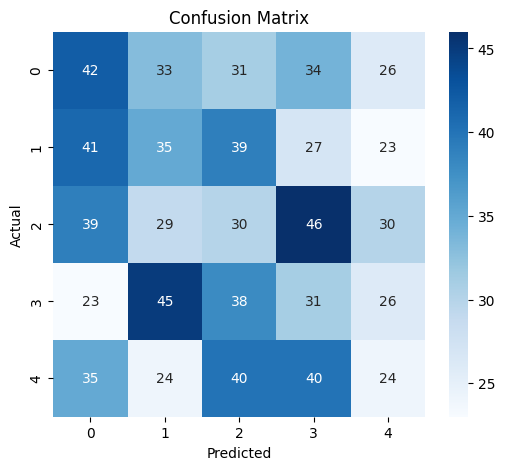

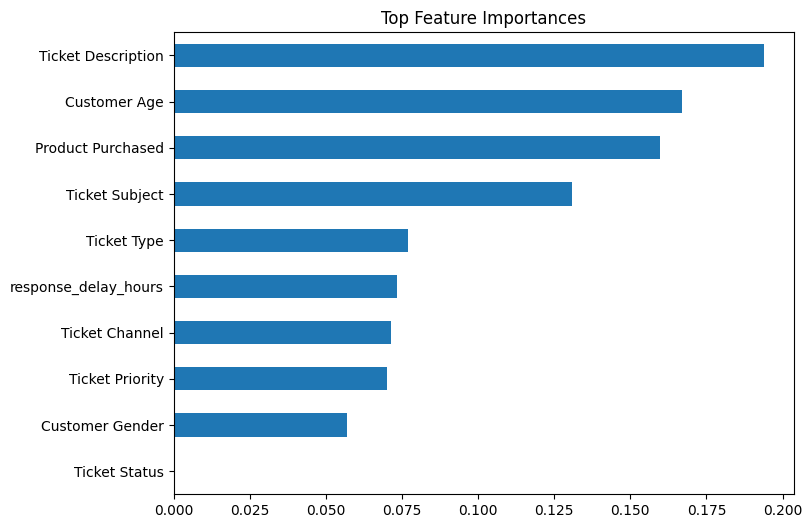

In [101]:
# Predict and evaluate the model on the test set
y_pred = rfc.predict(X_test)

# Print overall accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

# Display detailed classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Function to plot Confusion Matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm)

# Function to plot Feature Importances
def plot_feature_importances(model, features):
    try:
        importances = pd.Series(model.feature_importances_, index=features)
        # Select top 15 features or fewer if not available
        top_feats = importances.nlargest(15)
        plt.figure(figsize=(8,6))
        top_feats.plot(kind='barh')
        plt.title('Top Feature Importances')
        plt.gca().invert_yaxis() # Invert y-axis to have the most important feature at the top
        plt.show()
    except AttributeError:
        print('Feature importances are not available for this model type.')
    except Exception as e:
        print(f'Could not compute or plot feature importances: {e}')

# Call the function to plot feature importances
plot_feature_importances(rfc, X.columns)

In [102]:
# Save a CSV of sample predictions
pred_df = X_test.copy().reset_index(drop=True)
pred_df['true_satisfaction'] = y_test.reset_index(drop=True)
pred_df['pred_satisfaction'] = y_pred

output_filename = 'predictions.csv' # Define the output filename
pred_df.to_csv(output_filename, index=False)
print(f'Saved {output_filename} (sample):')
display(pred_df.head())

Saved predictions.csv (sample):


,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,response_delay_hours,true_satisfaction,pred_satisfaction
0,-1.755686,0.034712,1.345396,-1.457852,1.360956,1.689842,0.0,-1.328187,-1.344536,2.201231,5,3
1,0.687230,1.257830,0.774640,-1.457852,0.718387,-1.469555,0.0,0.451914,-1.344536,-0.035146,3,5
2,-1.755686,0.034712,1.182323,-1.457852,-1.209321,-1.269643,0.0,0.451914,1.351027,-0.035146,3,2
3,0.687230,1.257830,0.774640,-0.047661,1.146766,0.916325,0.0,1.341964,-1.344536,-0.035146,2,2
4,-0.039042,-1.188406,1.100787,-0.047661,1.360956,-1.391158,0.0,-1.328187,-1.344536,0.904062,4,3
